# Задание  
https://www.kaggle.com/uciml/mushroom-classification

Постройте классификатор грибов на съедобные, несъедобные и неизвестной съедобности.



Какая форма шляпки характерна для грибов неизвестной съедобности?

Какого цвета обычно съедобные грибы? Какого цвета почти не бывают?

# Выполним задание

In [1]:
import pandas as pd  # Pandas for data processing
import seaborn as sns  # Data visualization and plots 
import matplotlib.pyplot as plt  # Data visualization and plots 
from sklearn.preprocessing import LabelEncoder  # Lable encoder for logreg
from sklearn.linear_model import LogisticRegression  # Logistic regressian as model
from sklearn.model_selection import train_test_split  # Dataset splitter
from sklearn.metrics import accuracy_score  # Model score measurement

In [2]:
%matplotlib inline 

In [3]:
DATA_PATH = 'data/mushrooms.csv'

#importing frame
data = pd.read_csv(DATA_PATH) 
data.head(5)  # Print 5 rows of frame

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.describe()  # Get typical col values 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


##  Построим гистограмму числа съедобных и несъедобных грибов

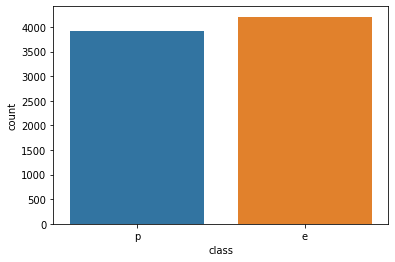

In [5]:
ax = sns.countplot(x=data['class'], data=data)

## Распределение цвета всех грибов по классам

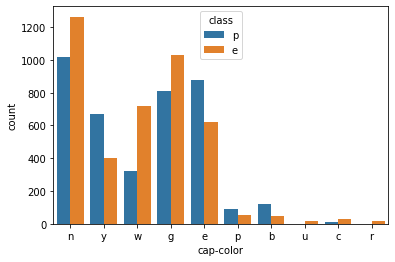

In [6]:
sns.countplot(x=data['cap-color'],hue=data['class'], data=data)

## Гистограмма цвета гриба для несъедобных 

In [7]:
pois = data.loc[data['class'] == "p"]

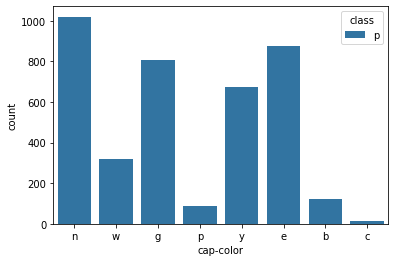

In [8]:
sns.countplot(x=pois['cap-color'],hue=pois['class'], data=pois)

Несъедобные: самый популярный цвет шапки brown=n - серый, самый редкий цвет cinnamon=c - корица, не бывает green=r - зеленый

## Гистограмма формы шляпки гриба для несъедобных 

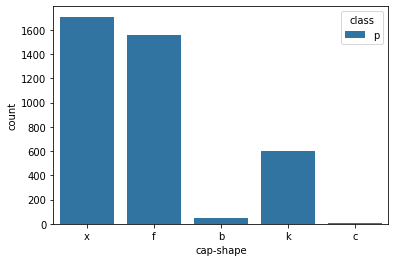

In [9]:
sns.countplot(x=pois['cap-shape'],hue=pois['class'], data=pois)

Несъедобные: характерные формы шляпки convex=x - выпуклая  и flat=f - плоская

## Классификатор съедобности гриба основанный на логистической регрессии

In [10]:
data['class'] = LabelEncoder().fit_transform(data['class'])  # Encode class type to 0/1
data.drop(['veil-type'],axis = 1)
y = data['class']
X = data.drop(['class'] , axis  = 1)
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Переведем все значения в бинарный вид - воспользуемся pandas.get_dummies 

In [11]:
for cols in X.columns:
    if(len(X[cols].value_counts()) ==2):  # Unique values
        X[cols] = LabelEncoder().fit_transform(X[cols])
X = pd.get_dummies(X)
X.head(5)

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
y =  LabelEncoder().fit_transform(y)

### Разобьем датасет на тестовую и обучающую выборку. Выполним обучение - подгонку(fit) логистической регрессии 

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)
logreg = LogisticRegression()
logreg.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Получим предсказание 

In [14]:
log_pred = logreg.predict(test_X)

In [15]:
log_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [16]:
test_y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [17]:
len(log_pred)

1625

In [18]:
len(test_y)

1625

### Оценим точность модели

In [19]:
accuracy_score(test_y, log_pred)

0.9993846153846154

accuracy score: 99%